following :

 https://langchain-ai.github.io/langgraph/tutorials/introduction/#setup

In [1]:
%pip install -U langgraph langsmith langchain_anthropic

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install langchain_groq

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import getpass
import os
from dotenv import find_dotenv, load_dotenv

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
groq_api_key = os.getenv("groq_api_key")
os.environ["groq_api_key"] = groq_api_key 

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("groq_api_key")

In [5]:
os.environ.get("groq_api_key")

'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'

In [6]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [7]:
from langchain_anthropic import ChatAnthropic
from langchain_groq import ChatGroq
#llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [8]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

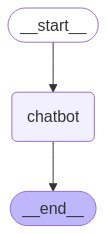

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [19]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: I am Gemma, an open-weights AI assistant. I am a large language model trained by Google DeepMind.

Here are some key things to know about me:

* **Open-weights:** My weights are publicly accessible. This means anyone can see, study, and modify me.
* **Text-only:** I can only communicate through text. I can't generate images, sound, or videos.
* **Limited knowledge:** I was trained on a massive dataset of text, but my knowledge is only up to a certain point in time. I don't have access to real-time information or Google Search.
* **Created by the Gemma team:** I was developed by a team of engineers and researchers at Google DeepMind.

I'm here to help with a variety of tasks, such as:

* Answering your questions
* Generating creative text formats
* Translating languages
* Summarizing text
* And much more!

Just keep in mind my limitations. I'm still under development and learning new things every day.

Assistant: I am Gemma, an open-weights AI assistant. I am a large language

## PART 2

In [10]:
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
tavily_api_key = os.getenv("tavily_api_key")
os.environ["tavily_api_key"] = tavily_api_key

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("tavily_api_key")

In [22]:
%pip install -U tavily-python langchain_community

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ---------------------------------------- 43.8/43.8 kB ? eta 0:00:00
  Using cached langchain_community-0.3.20-py3-none-any.whl (2.5 MB)
     ---------------------------------------- 0.0/894.0 kB ? eta -:--:--
     -------------- ---------------------- 358.4/894.0 kB 11.2 MB/s eta 0:00:01
     ------------------------------------- 894.0/894.0 kB 14.3 MB/s eta 0:00:00
  Using cached pydantic_settings-2.8.1-py3-none-any.whl (30 kB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
  Using cached sqlalchemy-2.0.39-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
  Using cached langchain-0.3.21-py3-none-any.whl (1.0 MB)
  Using cached aiohttp-3.11.14-cp310-cp310-win_amd64.whl (442 kB)
  Using cached frozenlist-1.5.0-cp310-cp310-win_amd64.whl (51 kB)
  Using cached attrs-25.3.0-py3-none-any.whl (63 


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'LangGraph Glossary - GitHub Pages',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n[](https://langchain-ai.github.io/langgraph/concepts/low_level/#__codelineno-7-1)from langchain_core.runnables import RunnableConfig [...] By composing Nodes and Edges, you can create complex, looping workflows that evolve the State over time. The real power, though, comes from how LangGraph manages that State. To emphasize: Nodes and Edges are nothing more than Python functions - they can contain an LLM or just good ol\' Python code.\nIn short: nodes do the work. edges tell what to do next. [...] Nodes: Python functions that enco

In [ ]:
from typing import Annotated

from langchain_anthropic import ChatAnthropic
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


#llm = ChatAnthropic(model="claude-3-5-sonnet-20240620")
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)